<a href="https://colab.research.google.com/github/diamond-nicholas/regression_model_with_keras/blob/main/regression_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62d614fa90>,
      dtype=object)

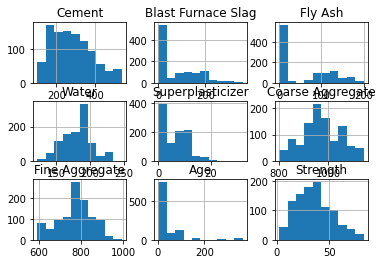

In [ ]:
concrete_data.hist()

In [ ]:
concrete_data.shape

(1030, 9)

In [ ]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [ ]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

In [ ]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [ ]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [ ]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [ ]:
n_cols = predictors_norm.shape[1] # number of predictors
n_cols

8

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

Build Network

In [ ]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

Train and test the model


In [ ]:
# build the model
model = regression_model()
model

In [ ]:
# fit the model
model.fit(predictors_norm, target, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
23/23 - 2s - loss: 1679.3405 - val_loss: 1154.7690 - 2s/epoch - 100ms/step
Epoch 2/100
23/23 - 0s - loss: 1552.2413 - val_loss: 1027.2996 - 128ms/epoch - 6ms/step
Epoch 3/100
23/23 - 0s - loss: 1356.5728 - val_loss: 828.9183 - 174ms/epoch - 8ms/step
Epoch 4/100
23/23 - 0s - loss: 1047.3035 - val_loss: 566.2121 - 176ms/epoch - 8ms/step
Epoch 5/100
23/23 - 0s - loss: 663.7913 - val_loss: 327.0051 - 111ms/epoch - 5ms/step
Epoch 6/100
23/23 - 0s - loss: 364.1678 - val_loss: 197.6713 - 132ms/epoch - 6ms/step
Epoch 7/100
23/23 - 0s - loss: 252.3908 - val_loss: 170.9039 - 113ms/epoch - 5ms/step
Epoch 8/100
23/23 - 0s - loss: 225.8788 - val_loss: 166.4159 - 308ms/epoch - 13ms/step
Epoch 9/100
23/23 - 0s - loss: 213.0535 - val_loss: 163.2097 - 192ms/epoch - 8ms/step
Epoch 10/100
23/23 - 0s - loss: 202.7364 - val_loss: 162.9921 - 210ms/epoch - 9ms/step
Epoch 11/100
23/23 - 0s - loss: 195.4449 - val_loss: 160.8914 - 118ms/epoch - 5ms/step
Epoch 12/100
23/23 - 0s - loss: 187.8983 - val